<a href="https://colab.research.google.com/github/hthomas229/PurpleCrown/blob/main/Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning:
#Multiclass Classification of Glass

##Load the Necessary Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Get Data  *R package mlbench:: Glass*

In [ ]:
df = pd.read_csv('/content/Glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


##Explore the Data

In [ ]:
df['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


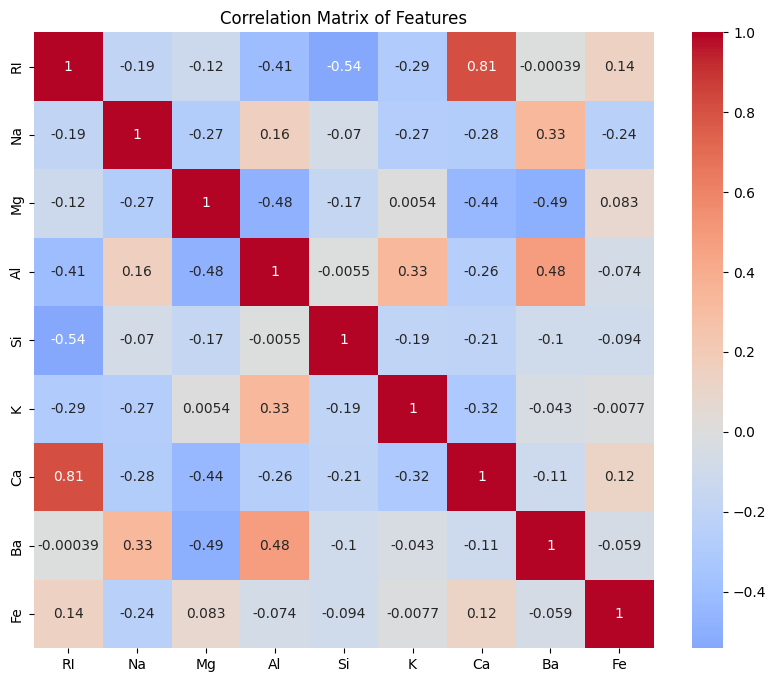

In [ ]:
# Calculate correlation matrix
correlation_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

## Split Data Between Features (X) and Labels (Y)

In [ ]:
y = df['Type']
X = df[['RI', 'Na',	'Mg',	'Al',	'Si',	'K',	'Ca',	'Ba',	'Fe']]

In [ ]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


<Axes: xlabel='Type', ylabel='count'>

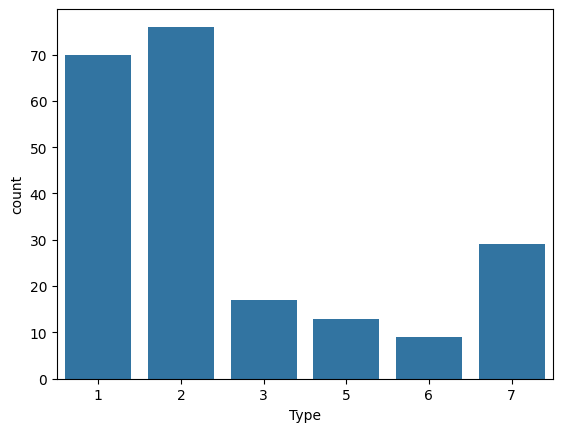

In [ ]:
# graph target label distribution
sns.countplot(x = y)

# Split the Data into Training and Testing Datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((171, 9), (43, 9))

#Create and Fit Random ForestClassifier

In [ ]:
model_rf = make_pipeline(MinMaxScaler(),
                         RandomForestClassifier()
                         )

model_rf.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

#Make Predictions and Check Accuracy





In [ ]:
y_pred = model_rf.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.8604651162790697

In [ ]:
cm =confusion_matrix(y_pred, y_test)
cm

array([[11,  3,  1,  0,  0,  0],
       [ 0, 11,  0,  2,  0,  0],
       [ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  8]])

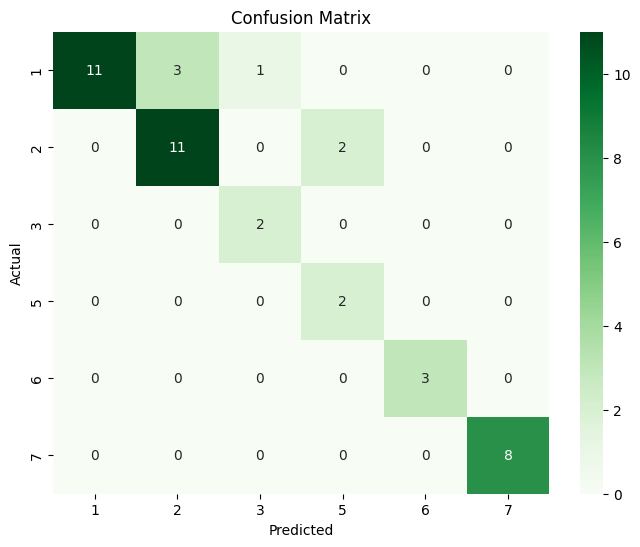

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=df['Type'].unique(), yticklabels=df['Type'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Create and Fit GradientBoostingClassifier

In [ ]:
model_gb = GradientBoostingClassifier()

model_gb.fit(X_train,y_train)

GradientBoostingClassifier(min_samples_leaf=2)

#Make Predictions and Check Accuracy

In [ ]:
y_pred = model_gb.predict(X_test)
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 2, 2, 6, 5, 6, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 3, 1, 2, 1, 7, 1])

In [ ]:
accuracy_score(y_pred ,y_test)

0.8837209302325582

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.86      0.92      0.89        13
           3       1.00      0.75      0.86         4
           5       0.75      1.00      0.86         3
           6       0.33      1.00      0.50         1
           7       1.00      0.89      0.94         9

    accuracy                           0.88        43
   macro avg       0.82      0.90      0.83        43
weighted avg       0.92      0.88      0.89        43



In [ ]:
cm =confusion_matrix(y_pred, y_test)
cm

array([[11,  2,  0,  0,  0,  0],
       [ 0, 12,  0,  1,  0,  0],
       [ 0,  0,  3,  0,  1,  0],
       [ 0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  8]])

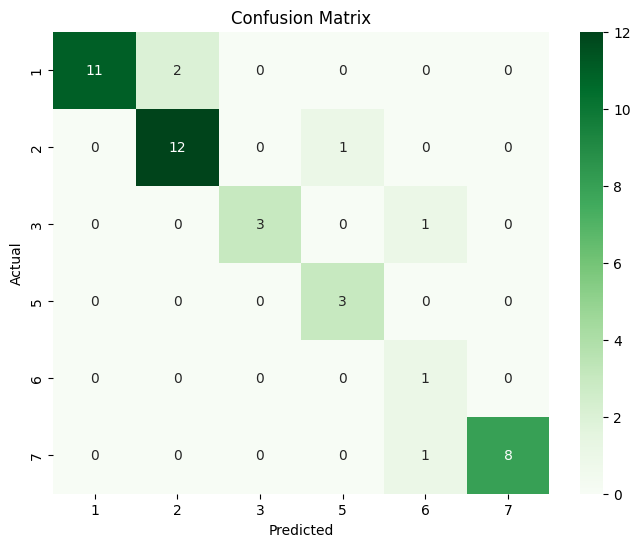

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=df['Type'].unique(), yticklabels=df['Type'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##Add Scaler to Try and Improve Results

In [ ]:
model_gb2 = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())


model_gb2.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [ ]:
y_pred = model_gb2.predict(X_test)
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 2, 2, 3, 5, 7, 1, 1, 7, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 3, 1, 2, 1, 7, 1])

In [ ]:
accuracy_score(y_pred ,y_test)

0.8604651162790697

Results were worse with scaler

**Best Model:  gb2 GradientBoostingClassifier Accuracy:  0.8837209302325582**